In [1]:
import kagglehub

path = kagglehub.dataset_download("awaiskaggler/insurance-csv")

print("Path to dataset files:", path)

100%|██████████| 13.4k/13.4k [00:00<00:00, 9.55MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/awaiskaggler/insurance-csv/versions/1


In [2]:
ls /root/.cache/kagglehub/datasets/awaiskaggler/insurance-csv/versions/1

insurance.csv


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/root/.cache/kagglehub/datasets/awaiskaggler/insurance-csv/versions/1/insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [88]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

In [89]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [90]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [91]:
df['region'] = df['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

In [92]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,3,10600.55
1334,18,0,31.9,0,0,4,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,1,2007.95


In [135]:
df.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,2.484305,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.104885,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,1.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,2.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,3.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,4.000000,63770.430000


In [93]:
age_vector = df['age']
sex_vector = df['sex']
bmi_vector = df['bmi']
children_vector = df['children']
smoker_vector = df['smoker']
region_vector = df['region']
expenses_vector = df['expenses']

In [94]:
sex_factor = pd.Categorical(df['sex'])
smoker_factor = pd.Categorical(df['smoker'])
region_factor = pd.Categorical(df['region'])

In [95]:
list_of_vectors = [age_vector, sex_vector, bmi_vector, children_vector, smoker_vector, region_vector, expenses_vector]

list_of_factors = [sex_factor, smoker_factor, region_factor]

mixed_list = [list_of_vectors, list_of_factors, df]

In [96]:
matrix_numeric = df[['age', 'bmi', 'children', 'expenses']].to_numpy()

sex_encoded = pd.get_dummies(df['sex'], drop_first=True)
smoker_encoded = pd.get_dummies(df['smoker'], drop_first=True)
region_encoded = pd.get_dummies(df['region'])

matrix_full = np.hstack([
    df[['age', 'bmi', 'children', 'expenses']].to_numpy(),
    sex_encoded.to_numpy(),
    smoker_encoded.to_numpy(),
    region_encoded.to_numpy()
])

In [97]:
print(age_vector, sex_vector, bmi_vector, children_vector, smoker_vector, region_vector, expenses_vector)

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64 0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64 0       27.9
1       33.8
2       33.0
3       22.7
4       28.9
        ... 
1333    31.0
1334    31.9
1335    36.9
1336    25.8
1337    29.1
Name: bmi, Length: 1338, dtype: float64 0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64 0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64 0       1
1       2
2       2
3       3
4       3
       ..
1333    3
1334    4
1335    2
1336    1
1337    3
Name: region, Length: 1338, dtype: int64 0       16884.92
1        1725.55
2        4449.46
3   

In [98]:
print(sex_factor, smoker_factor, region_factor)

[0, 1, 1, 1, 1, ..., 1, 0, 0, 0, 0]
Length: 1338
Categories (2, int64): [0, 1] [1, 0, 0, 0, 0, ..., 0, 0, 0, 0, 1]
Length: 1338
Categories (2, int64): [0, 1] [1, 2, 2, 3, 3, ..., 3, 4, 2, 1, 3]
Length: 1338
Categories (4, int64): [1, 2, 3, 4]


In [99]:
print(list_of_vectors)

[0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64, 0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64, 0       27.9
1       33.8
2       33.0
3       22.7
4       28.9
        ... 
1333    31.0
1334    31.9
1335    36.9
1336    25.8
1337    29.1
Name: bmi, Length: 1338, dtype: float64, 0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64, 0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64, 0       1
1       2
2       2
3       3
4       3
       ..
1333    3
1334    4
1335    2
1336    1
1337    3
Name: region, Length: 1338, dtype: int64, 0       16884.92
1        1725.55
2        4449.

In [100]:
print(list_of_factors)

[[0, 1, 1, 1, 1, ..., 1, 0, 0, 0, 0]
Length: 1338
Categories (2, int64): [0, 1], [1, 0, 0, 0, 0, ..., 0, 0, 0, 0, 1]
Length: 1338
Categories (2, int64): [0, 1], [1, 2, 2, 3, 3, ..., 3, 4, 2, 1, 3]
Length: 1338
Categories (4, int64): [1, 2, 3, 4]]


In [101]:
print(mixed_list)

[[0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64, 0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64, 0       27.9
1       33.8
2       33.0
3       22.7
4       28.9
        ... 
1333    31.0
1334    31.9
1335    36.9
1336    25.8
1337    29.1
Name: bmi, Length: 1338, dtype: float64, 0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64, 0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64, 0       1
1       2
2       2
3       3
4       3
       ..
1333    3
1334    4
1335    2
1336    1
1337    3
Name: region, Length: 1338, dtype: int64, 0       16884.92
1        1725.55
2        4449

In [102]:
print(matrix_numeric)


[[1.900000e+01 2.790000e+01 0.000000e+00 1.688492e+04]
 [1.800000e+01 3.380000e+01 1.000000e+00 1.725550e+03]
 [2.800000e+01 3.300000e+01 3.000000e+00 4.449460e+03]
 ...
 [1.800000e+01 3.690000e+01 0.000000e+00 1.629830e+03]
 [2.100000e+01 2.580000e+01 0.000000e+00 2.007950e+03]
 [6.100000e+01 2.910000e+01 0.000000e+00 2.914136e+04]]


In [103]:
print(matrix_full)

[[19.  27.9  0.  ...  0.   0.   0. ]
 [18.  33.8  1.  ...  1.   0.   0. ]
 [28.  33.   3.  ...  1.   0.   0. ]
 ...
 [18.  36.9  0.  ...  1.   0.   0. ]
 [21.  25.8  0.  ...  0.   0.   0. ]
 [61.  29.1  0.  ...  0.   1.   0. ]]


In [104]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,3,10600.55
1334,18,0,31.9,0,0,4,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,1,2007.95


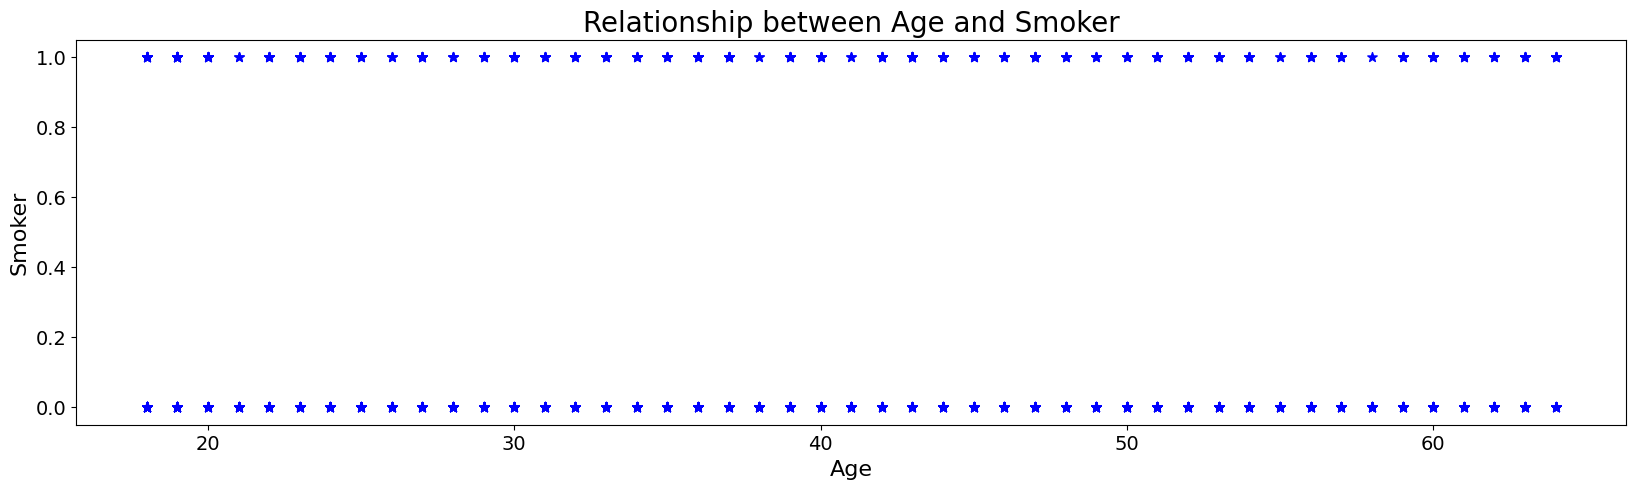

In [121]:
plt.rcParams['figure.figsize'] = [20, 5]
scatter_plot = df.plot.scatter(x='age', y='smoker',  marker='*', color='blue', s=50)
scatter_plot.set_title('Relationship between Age and Smoker', fontsize=20)
scatter_plot.set_xlabel('Age', fontsize=16)
scatter_plot.set_ylabel('Smoker', fontsize=16)
scatter_plot.tick_params(axis='both', which='major', labelsize=14)
plt.show()

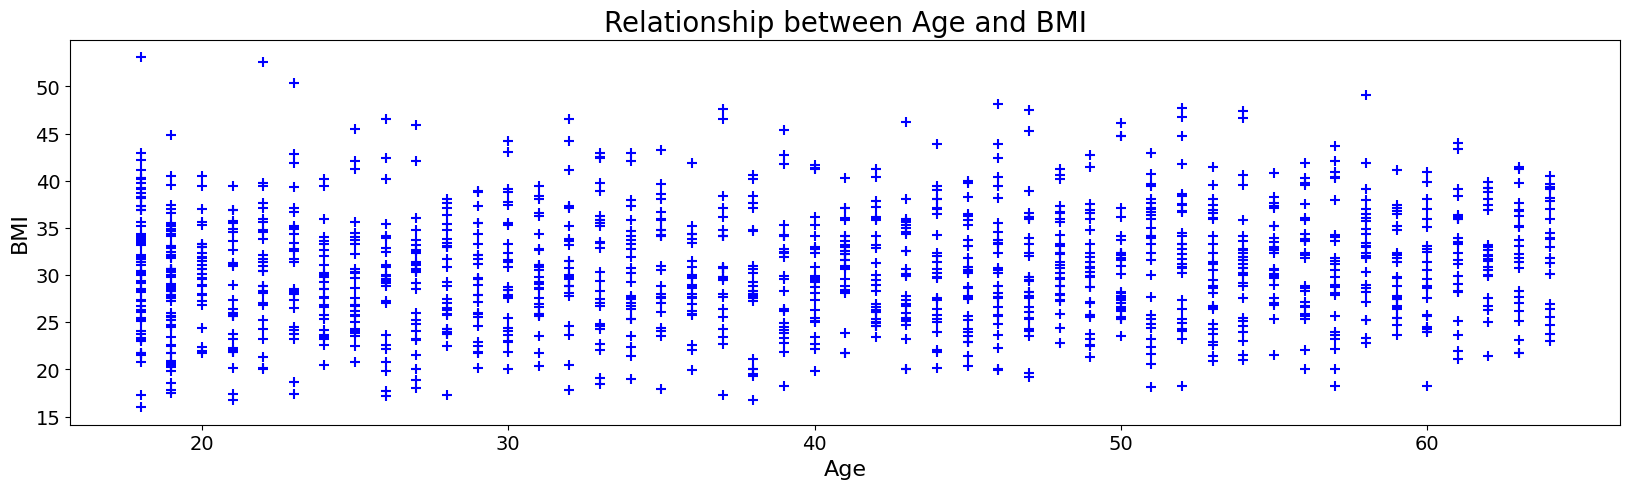

In [114]:
plt.rcParams['figure.figsize'] = [20, 5]
scatter_plot = df.plot.scatter(x='age', y='bmi', marker='+', color='blue', s=50)

scatter_plot.set_title('Relationship between Age and BMI', fontsize=20)
scatter_plot.set_xlabel('Age', fontsize=16)
scatter_plot.set_ylabel('BMI', fontsize=16)
scatter_plot.tick_params(axis='both', which='major', labelsize=14)


plt.show()

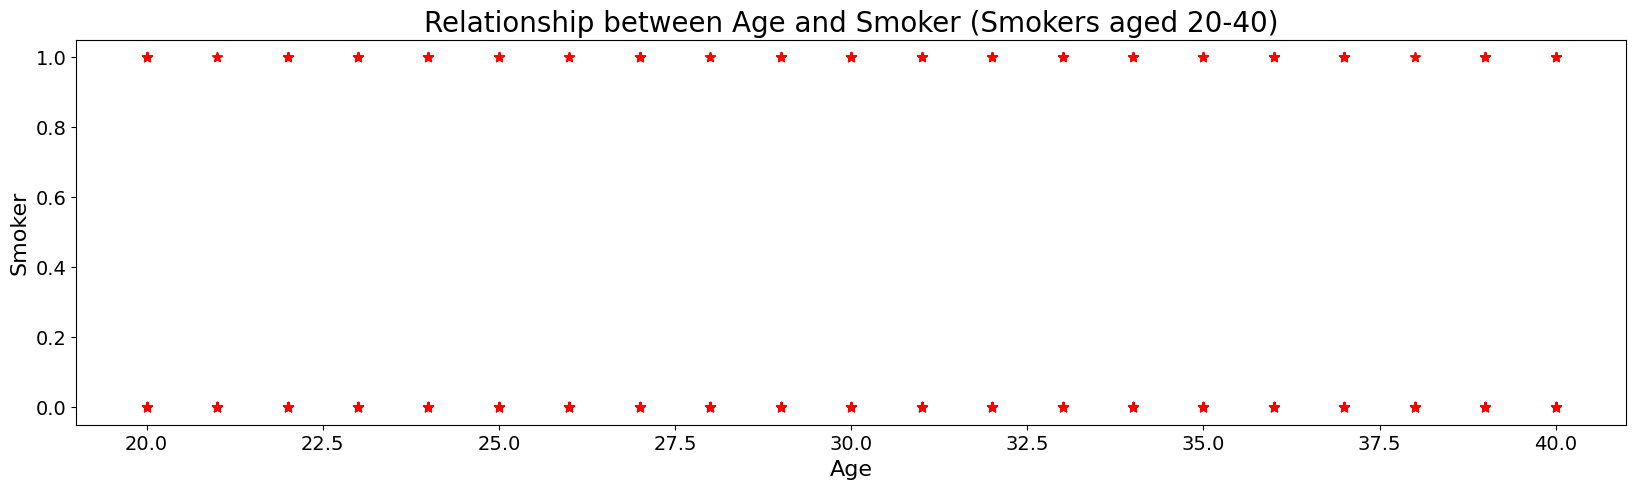

In [126]:
filtered_df = df[(df['age'] >= 20) & (df['age'] <= 40)]

plt.rcParams['figure.figsize'] = [20, 5]
scatter_plot = filtered_df.plot.scatter(x='age', y='smoker', marker='*', color='red', s=50)
scatter_plot.set_title('Relationship between Age and Smoker (Smokers aged 20-40)', fontsize=20)
scatter_plot.set_xlabel('Age', fontsize=16)
scatter_plot.set_ylabel('Smoker', fontsize=16)
scatter_plot.tick_params(axis='both', which='major', labelsize=14)
plt.show()

689


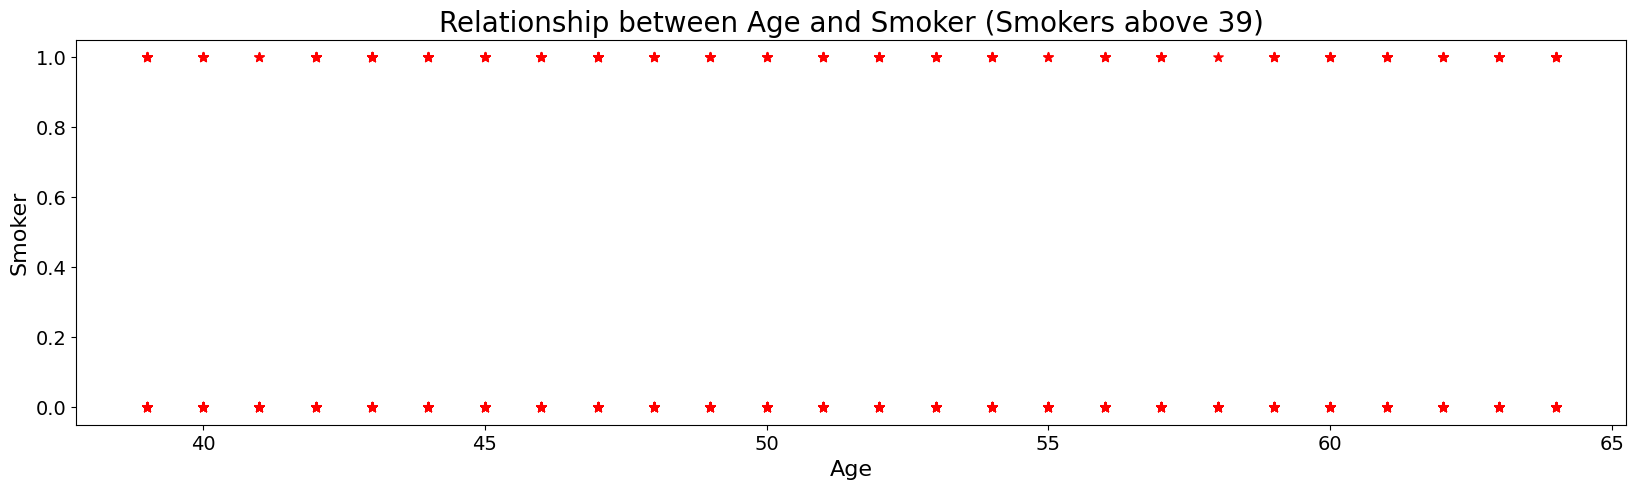

In [142]:
filtered_df = df[(df['age'] >= 39)]
print(len(df[df['age'] >= 39]))
plt.rcParams['figure.figsize'] = [20, 5]
scatter_plot = filtered_df.plot.scatter(x='age', y='smoker', marker='*', color='red', s=50)
scatter_plot.set_title('Relationship between Age and Smoker (Smokers above 39)', fontsize=20)
scatter_plot.set_xlabel('Age', fontsize=16)
scatter_plot.set_ylabel('Smoker', fontsize=16)
scatter_plot.tick_params(axis='both', which='major', labelsize=14)
plt.show()



674


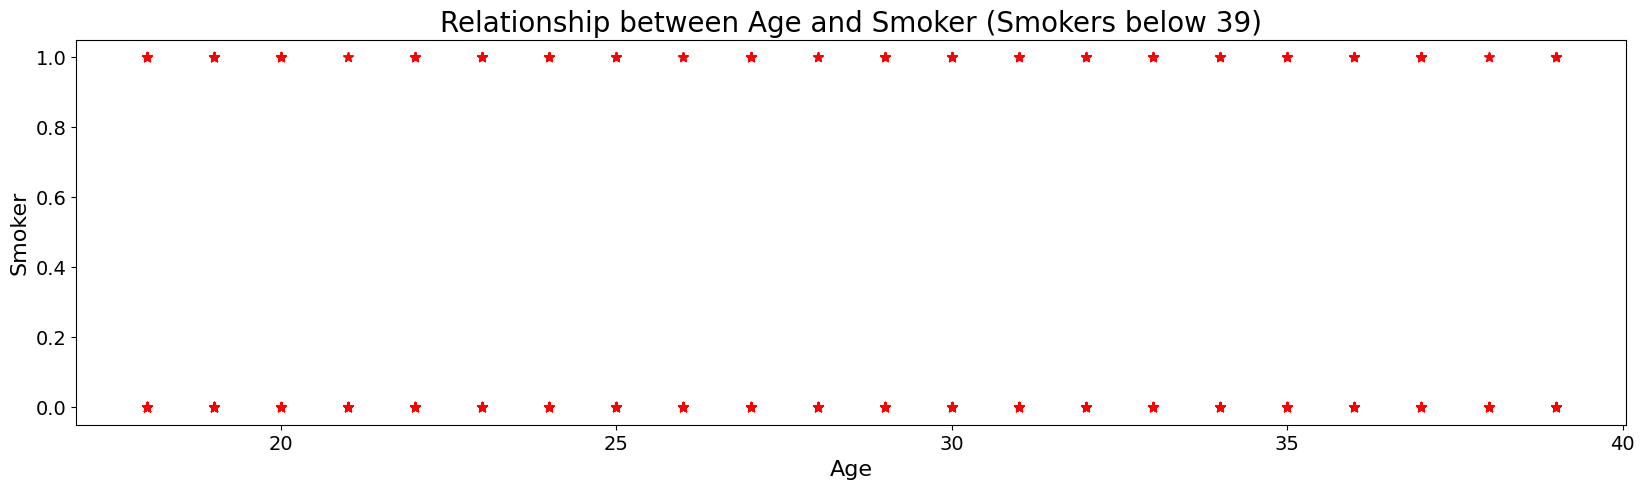

In [141]:
filtered_df = df[(df['age'] <= 39)]
print(len(df[df['age'] <= 39]))
plt.rcParams['figure.figsize'] = [20, 5]
scatter_plot = filtered_df.plot.scatter(x='age', y='smoker', marker='*', color='red', s=50)
scatter_plot.set_title('Relationship between Age and Smoker (Smokers below 39)', fontsize=20)
scatter_plot.set_xlabel('Age', fontsize=16)
scatter_plot.set_ylabel('Smoker', fontsize=16)
scatter_plot.tick_params(axis='both', which='major', labelsize=14)
plt.show()



In [152]:
abv39 = len(df[(df['age'] >= 39) & (df['smoker'] == 1)])
abv39

136

In [153]:
below39 = len(df[(df['age'] <= 39) & (df['smoker'] == 1)])
below39

144

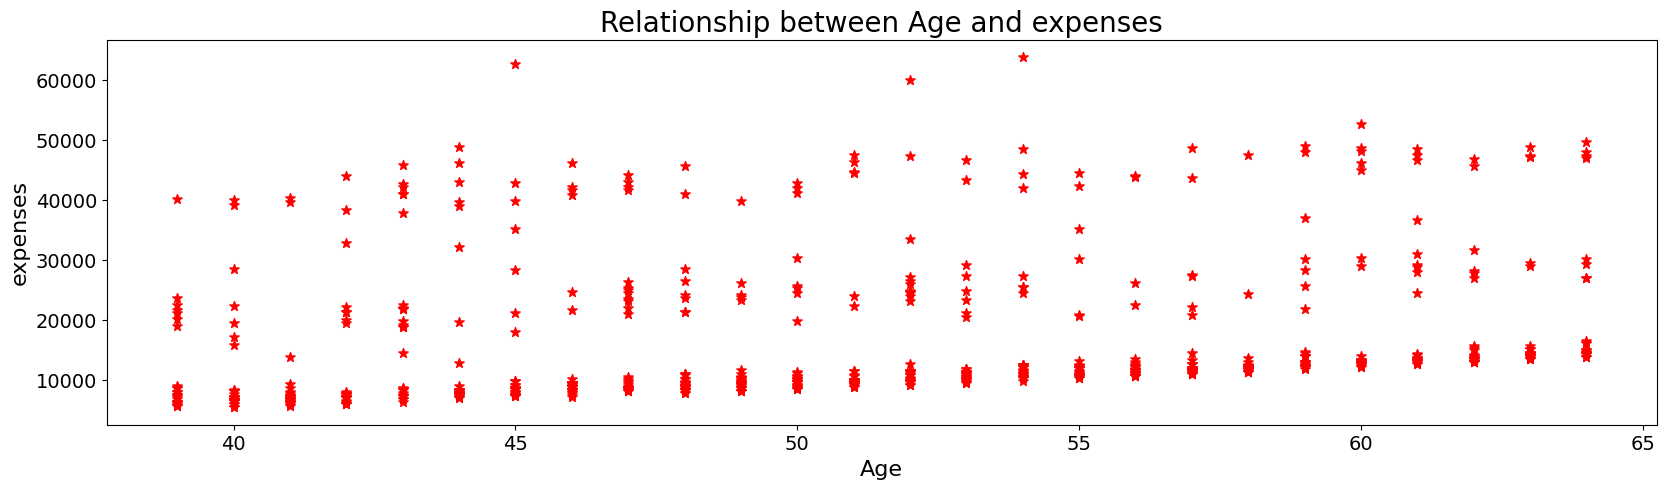

In [155]:
plt.rcParams['figure.figsize'] = [20, 5]
scatter_plot = filtered_df.plot.scatter(x='age', y='expenses', marker='*', color='red', s=50)
scatter_plot.set_title('Relationship between Age and expenses', fontsize=20)
scatter_plot.set_xlabel('Age', fontsize=16)
scatter_plot.set_ylabel('expenses', fontsize=16)
scatter_plot.tick_params(axis='both', which='major', labelsize=14)
plt.show()



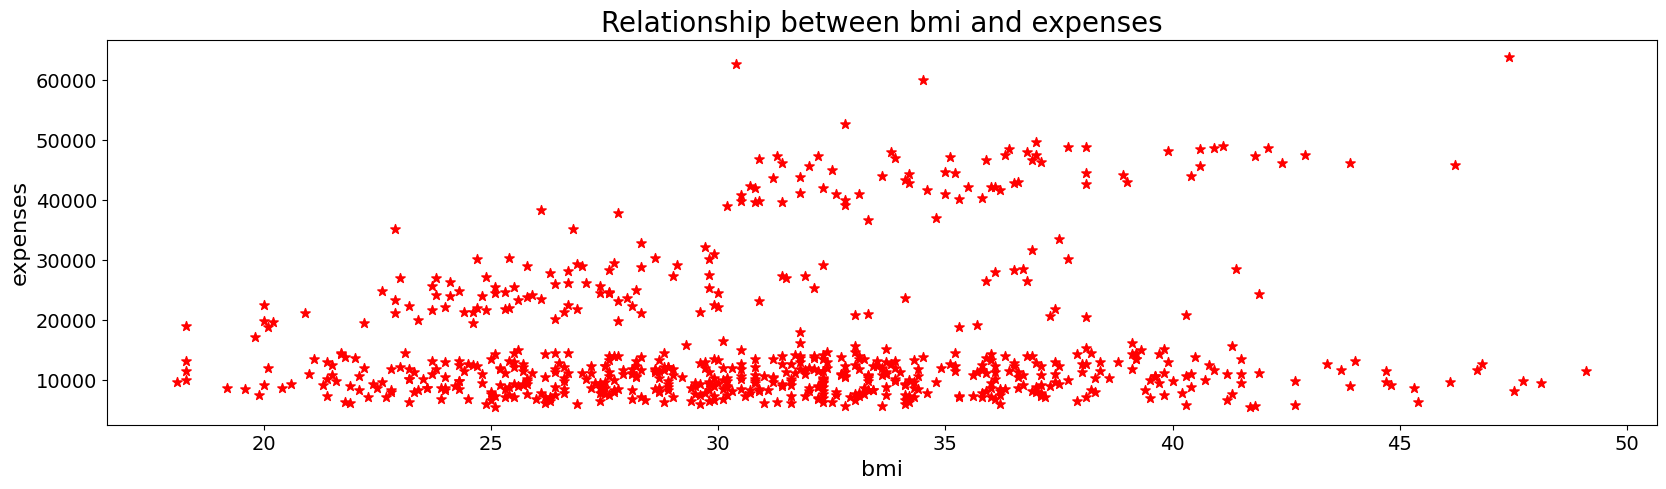

In [156]:
plt.rcParams['figure.figsize'] = [20, 5]
scatter_plot = filtered_df.plot.scatter(x='bmi', y='expenses', marker='*', color='red', s=50)
scatter_plot.set_title('Relationship between bmi and expenses', fontsize=20)
scatter_plot.set_xlabel('bmi', fontsize=16)
scatter_plot.set_ylabel('expenses', fontsize=16)
scatter_plot.tick_params(axis='both', which='major', labelsize=14)
plt.show()



In [158]:
smoker_expenses = df[df['smoker'] == 1]['expenses'].mean()
non_smoker_expenses = df[df['smoker'] == 0]['expenses'].mean()

print(f"Total expenses for smokers: {smoker_expenses}")
print(f"Total expenses for non-smokers: {non_smoker_expenses}")

if smoker_expenses > non_smoker_expenses:
    print("Smokers have higher total expenses.")
elif non_smoker_expenses > smoker_expenses:
    print("Non-smokers have higher total expenses.")
else:
    print("Smokers and non-smokers have equal total expenses.")

Total expenses for smokers: 32050.23197080292
Total expenses for non-smokers: 8434.268449248118
Smokers have higher total expenses.


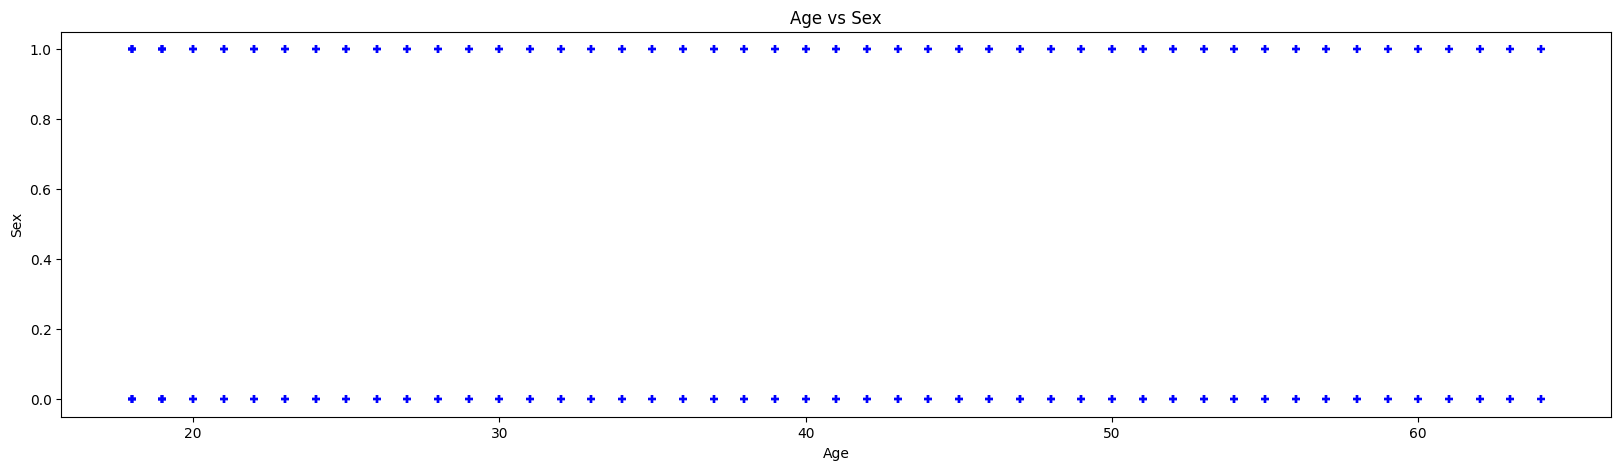

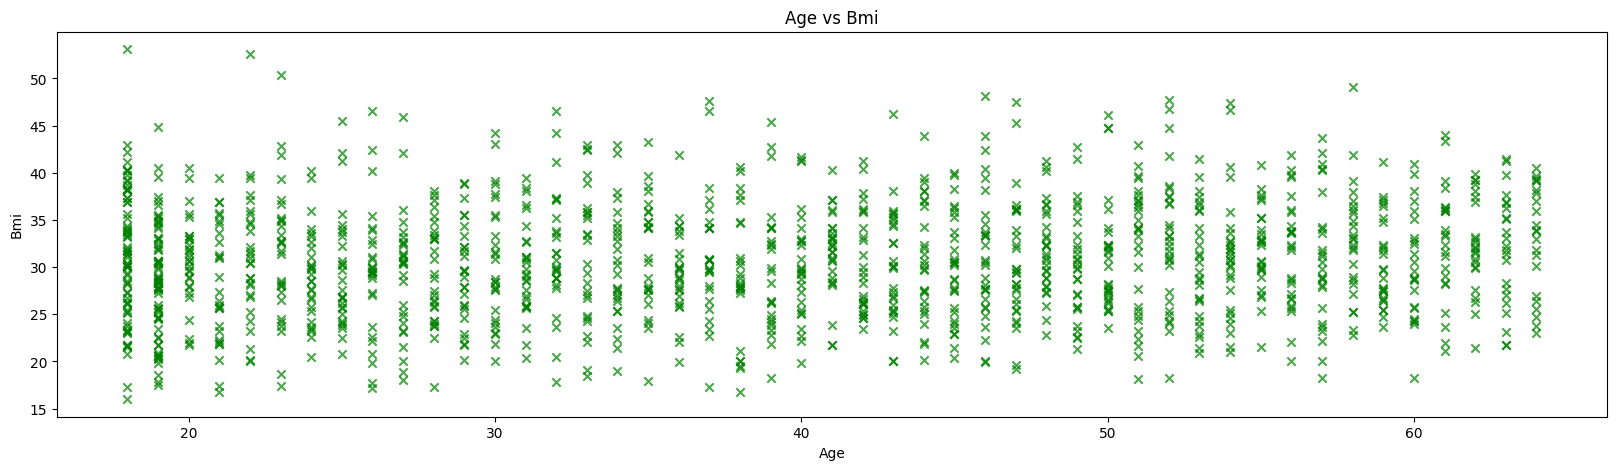

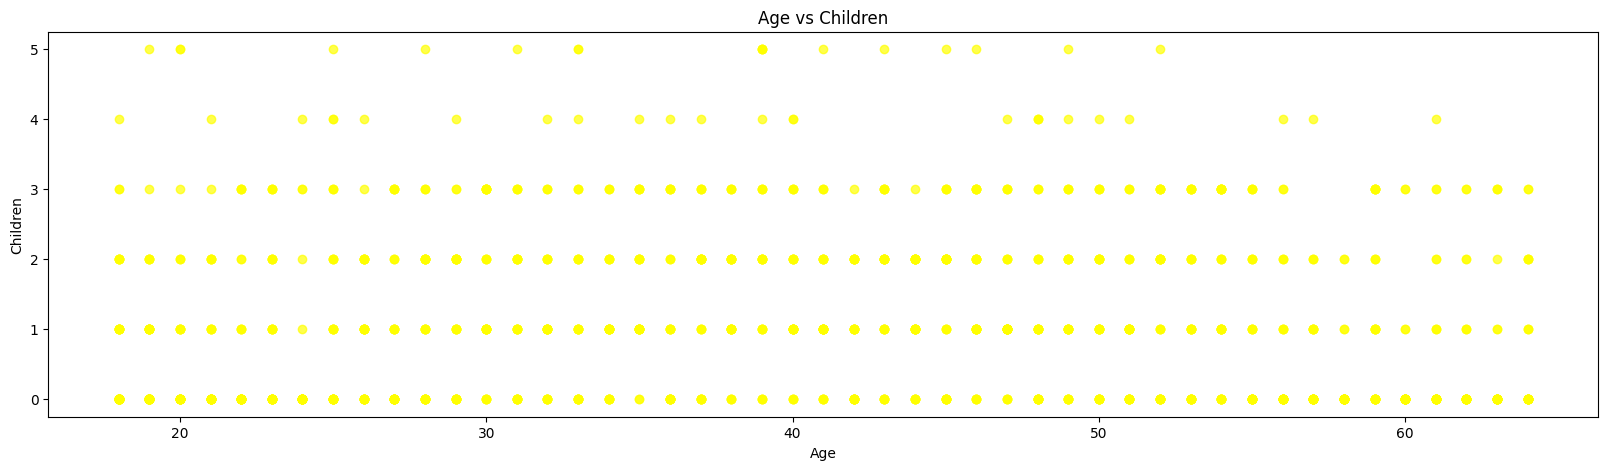

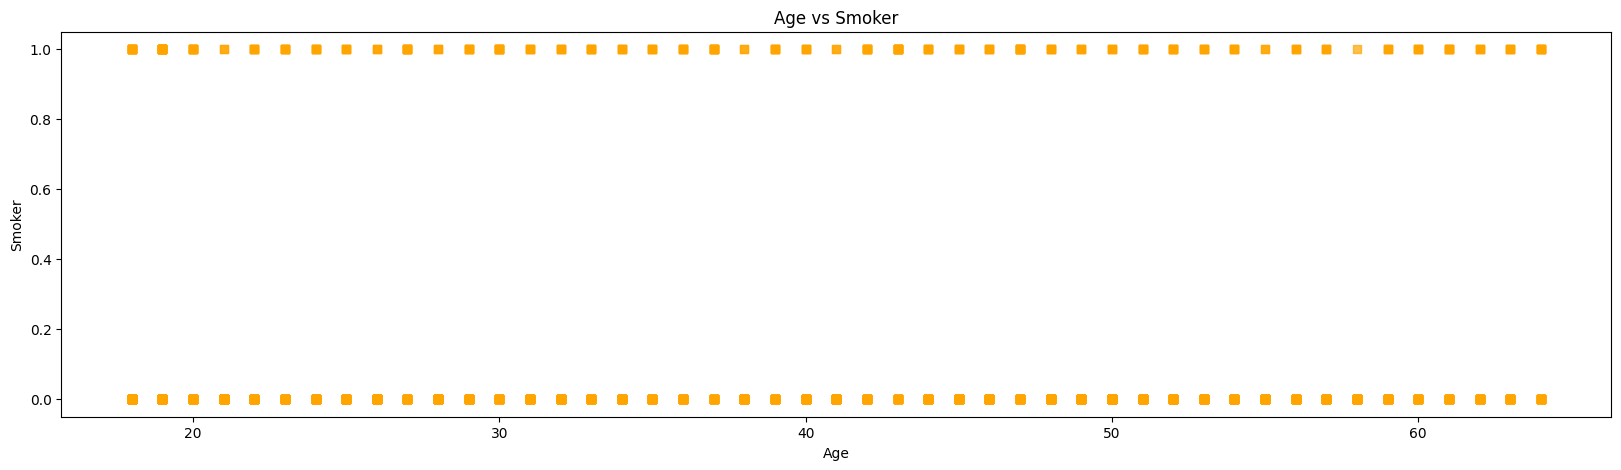

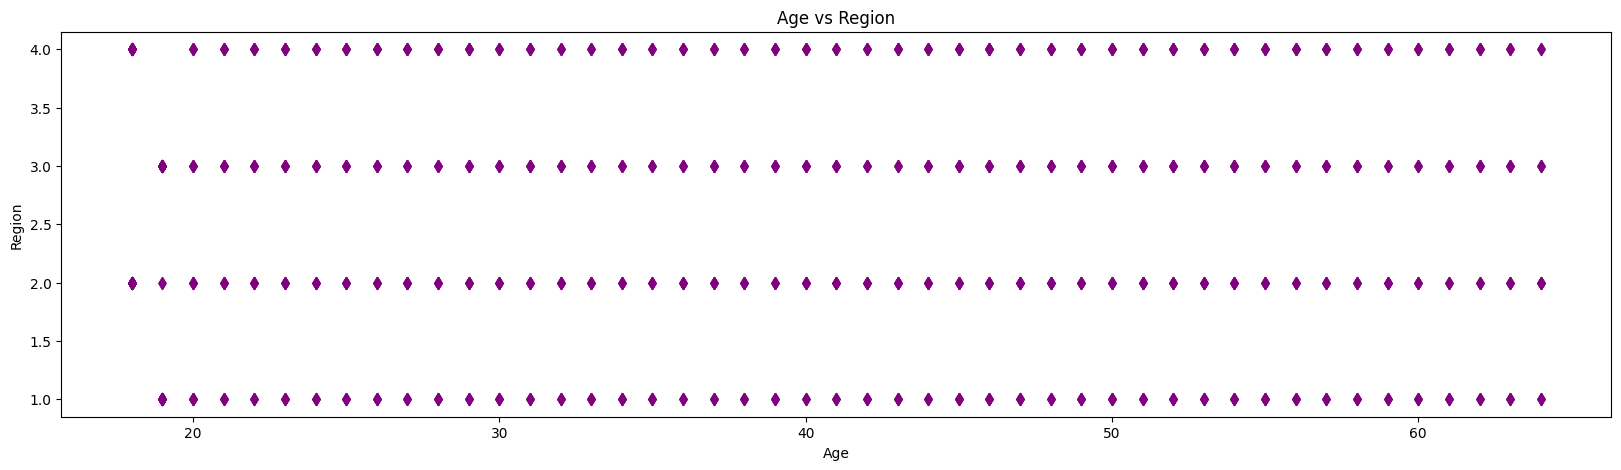

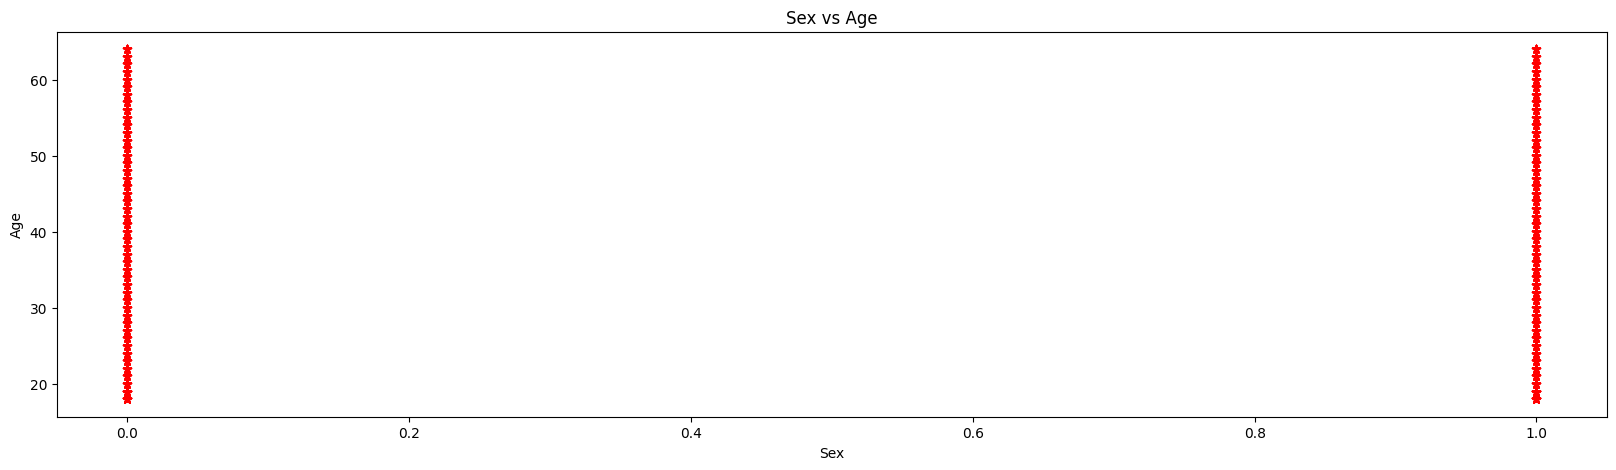

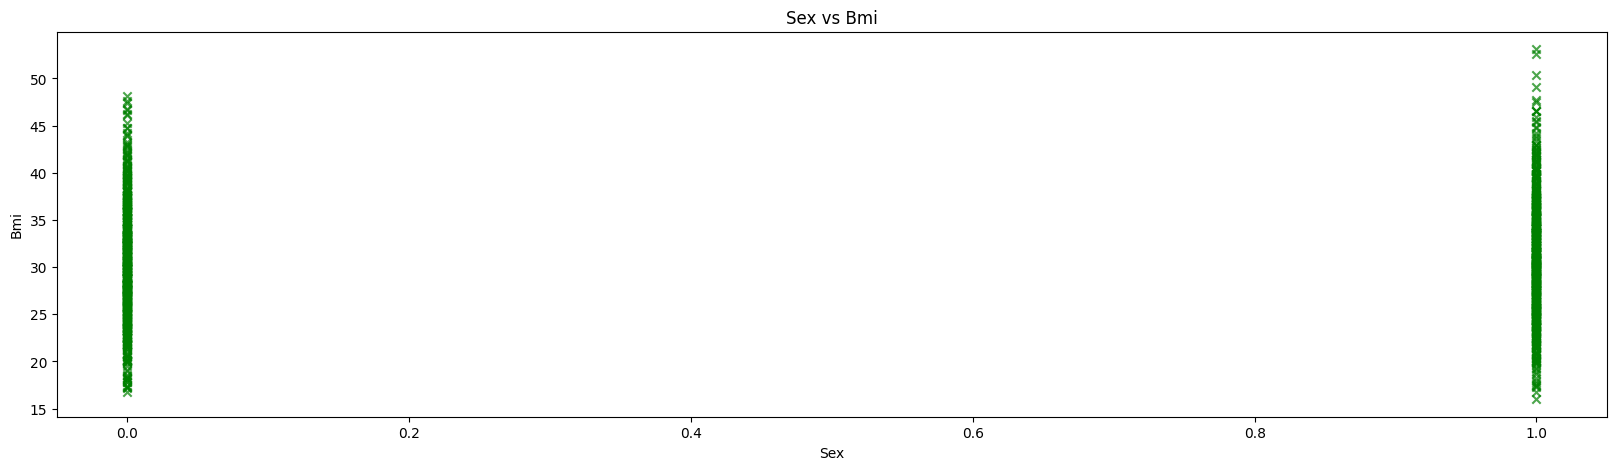

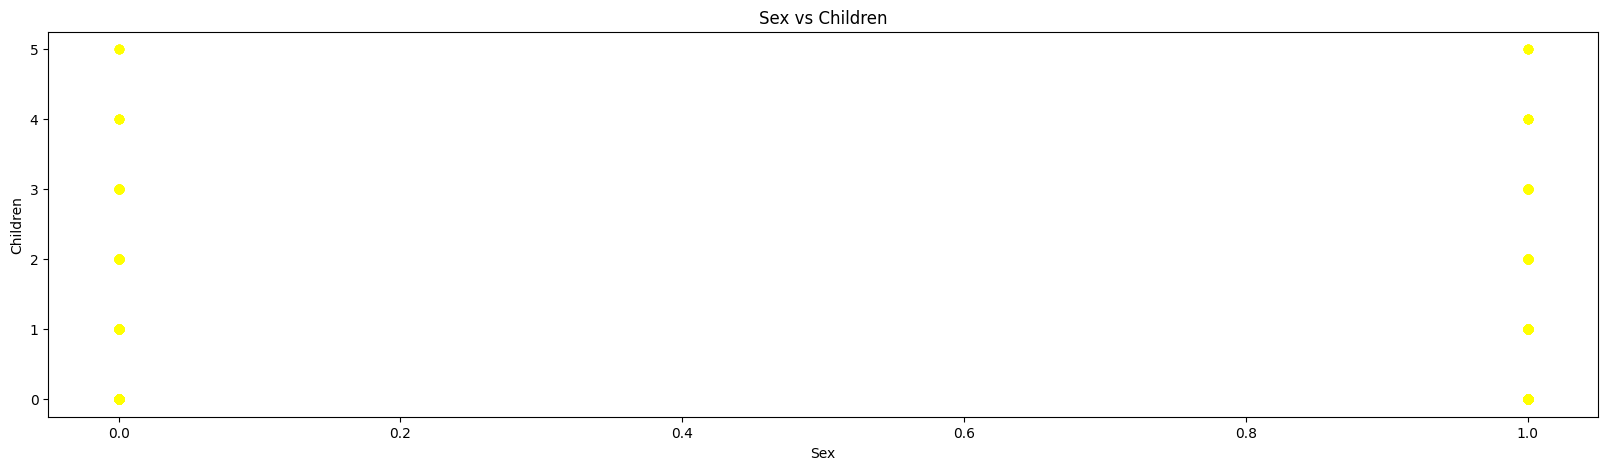

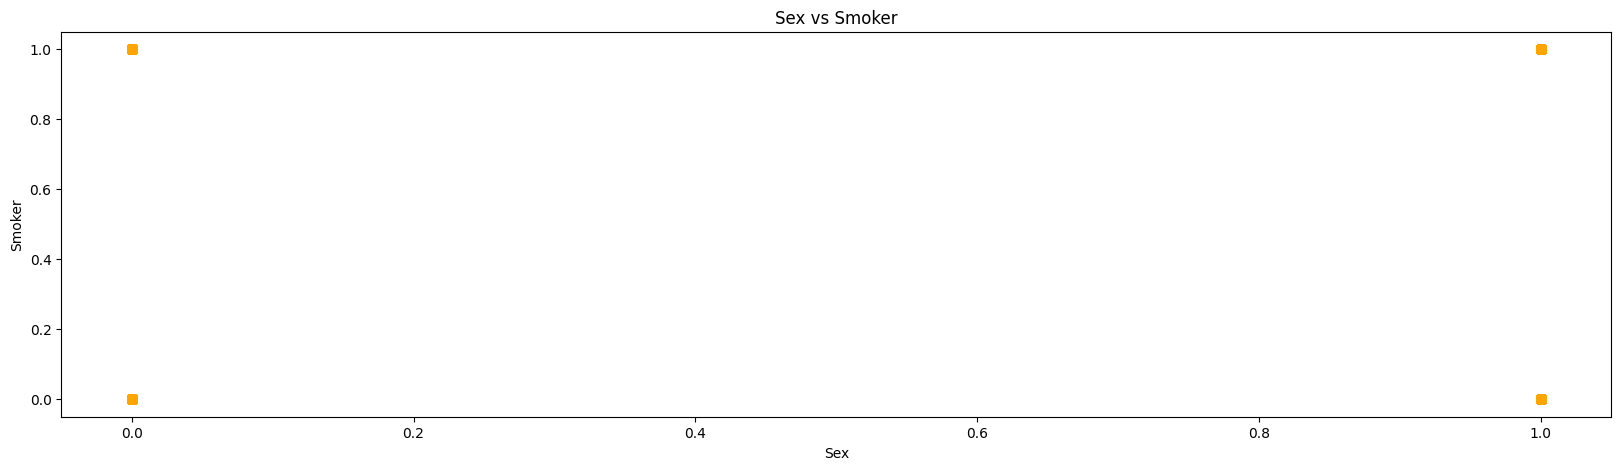

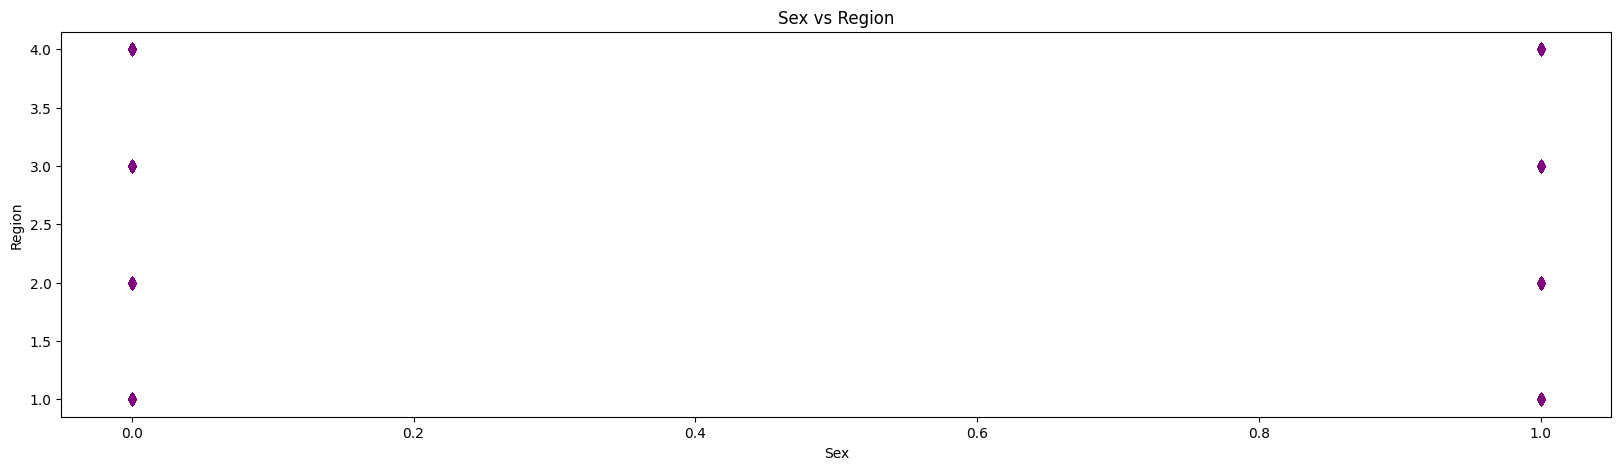

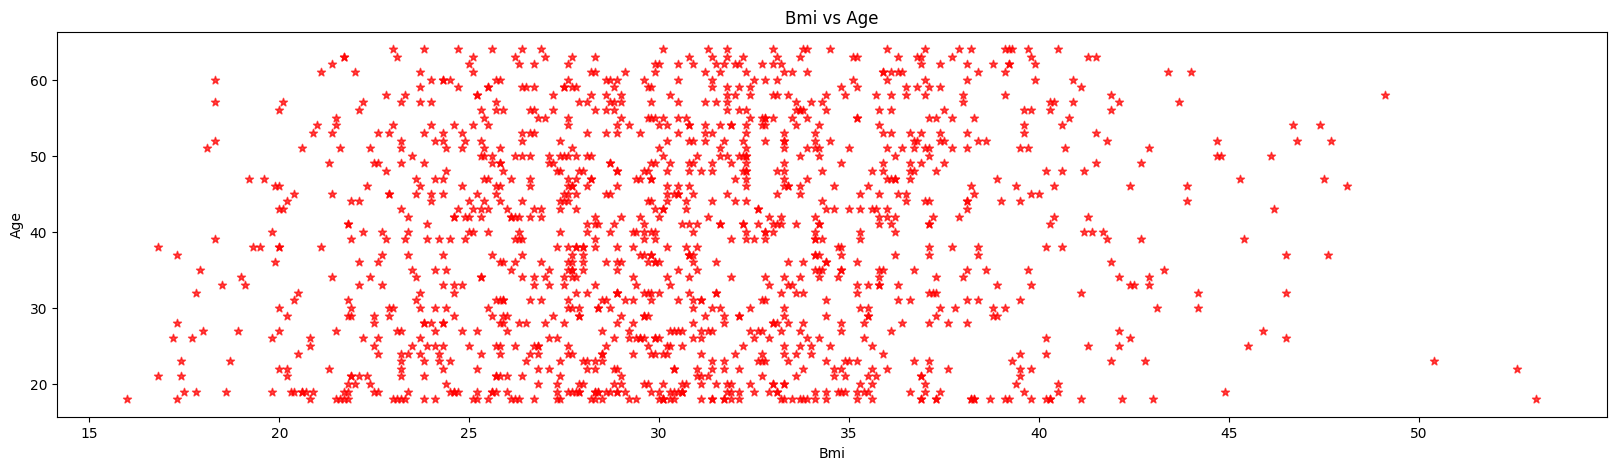

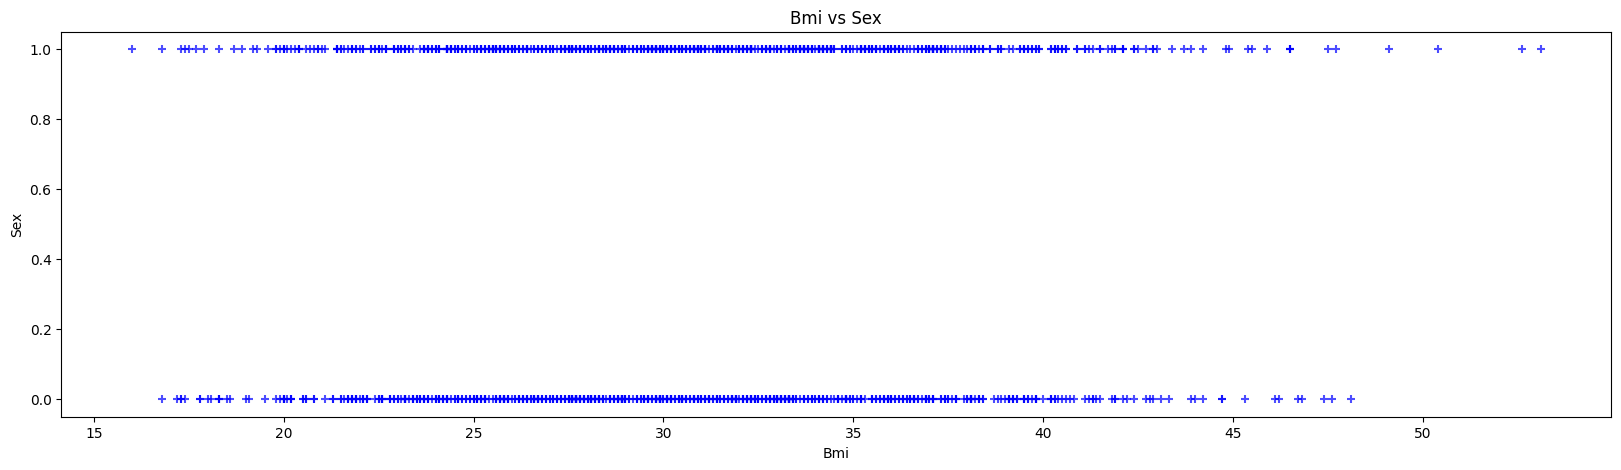

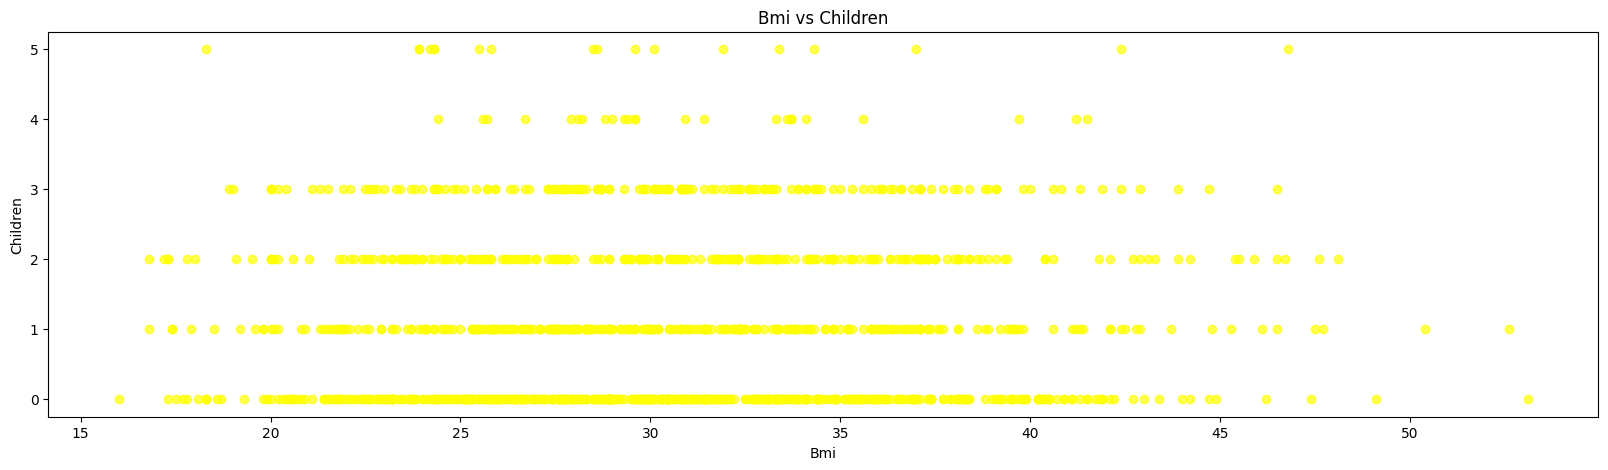

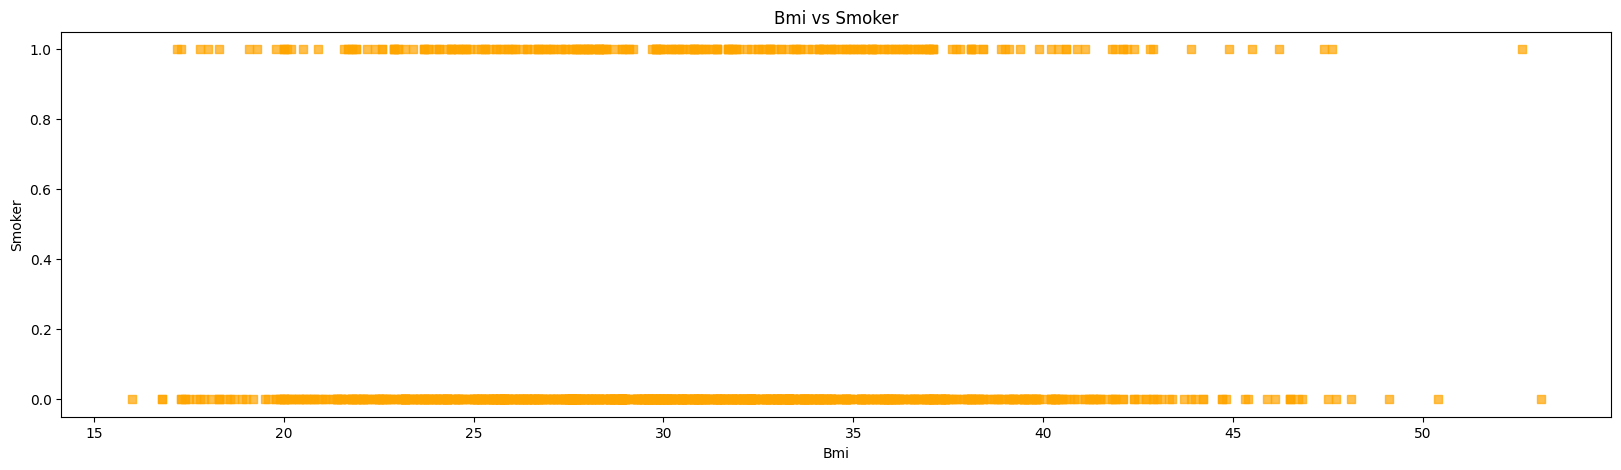

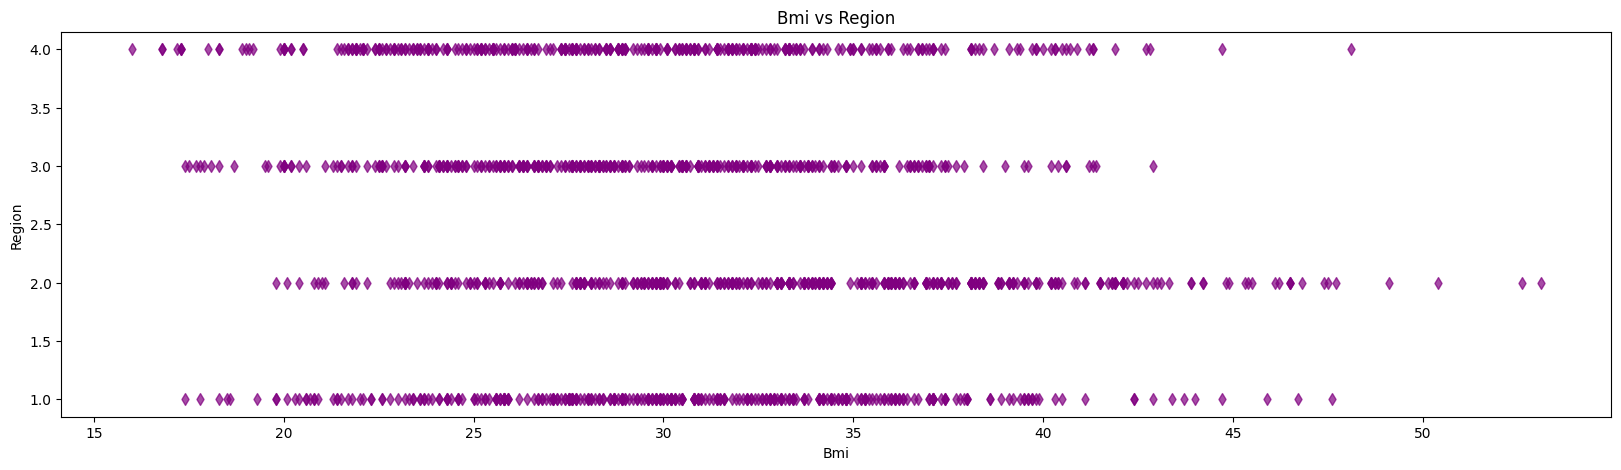

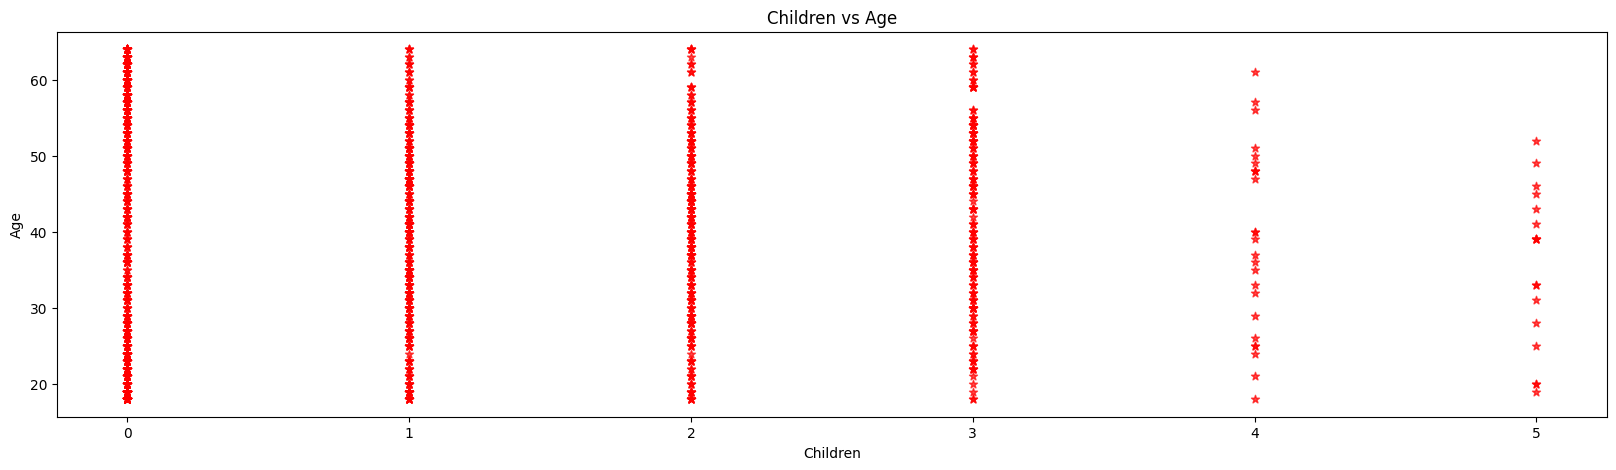

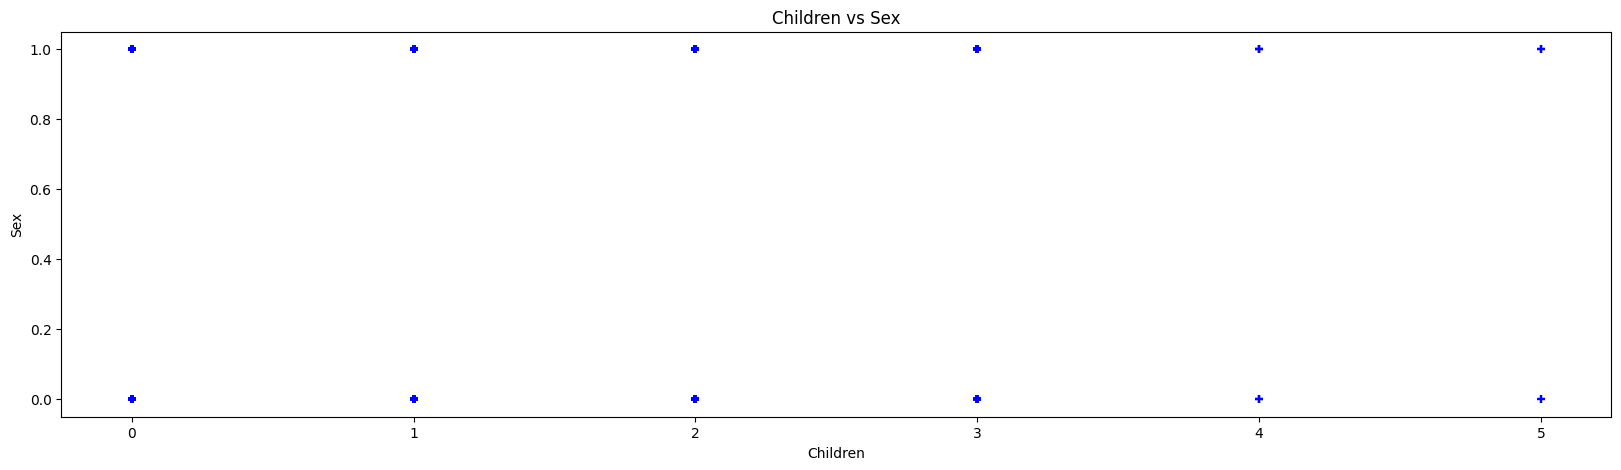

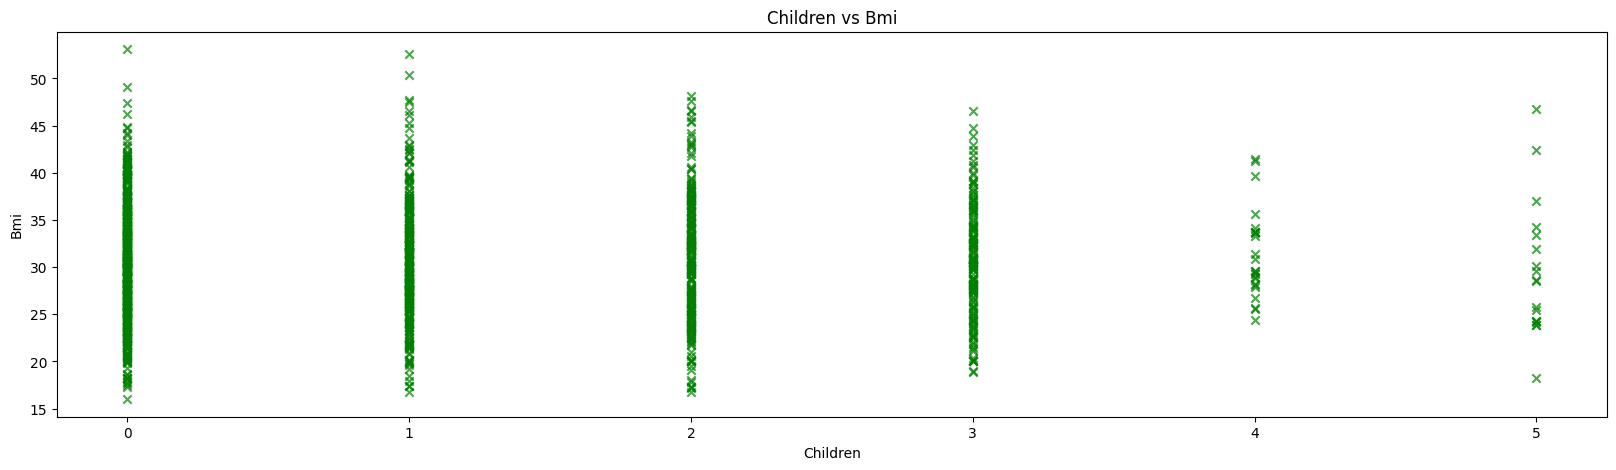

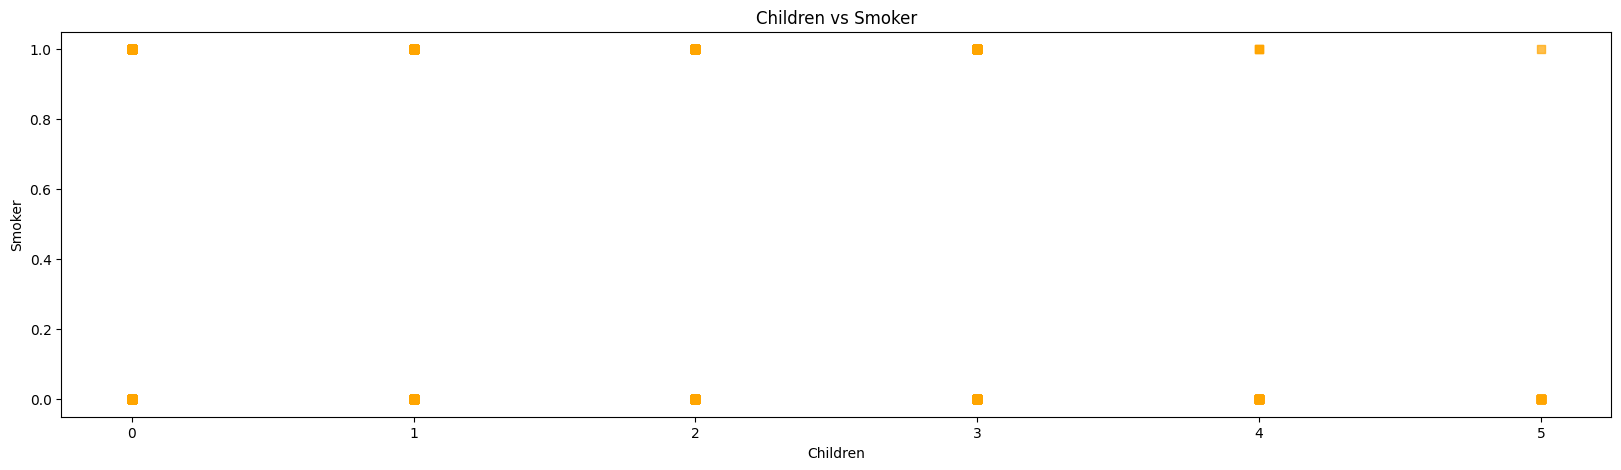

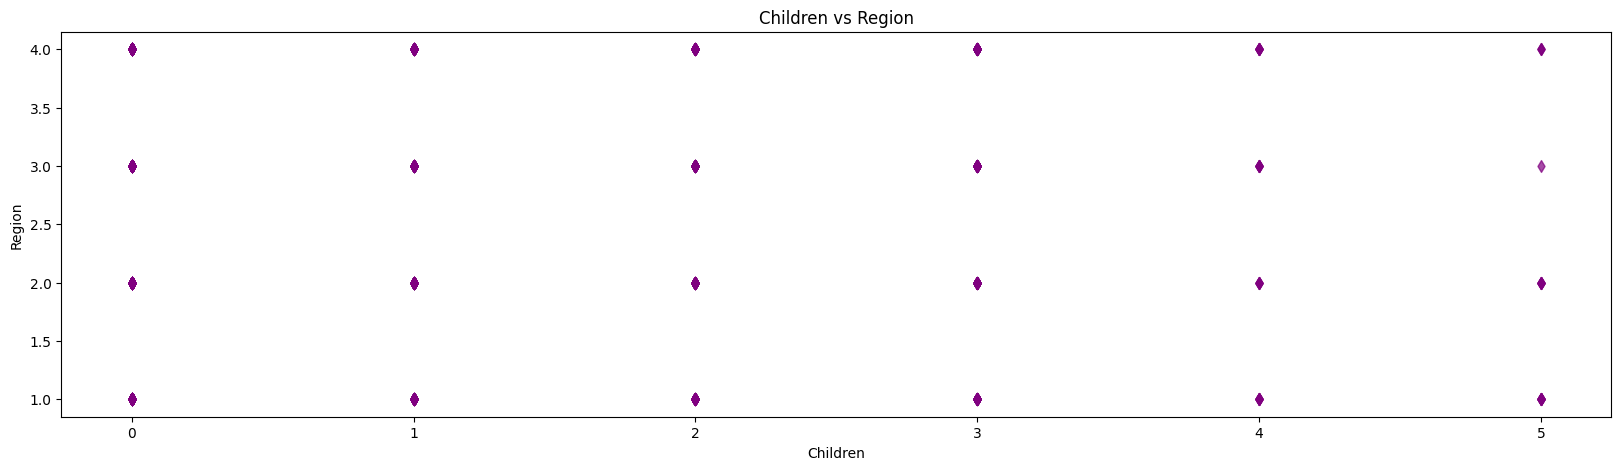

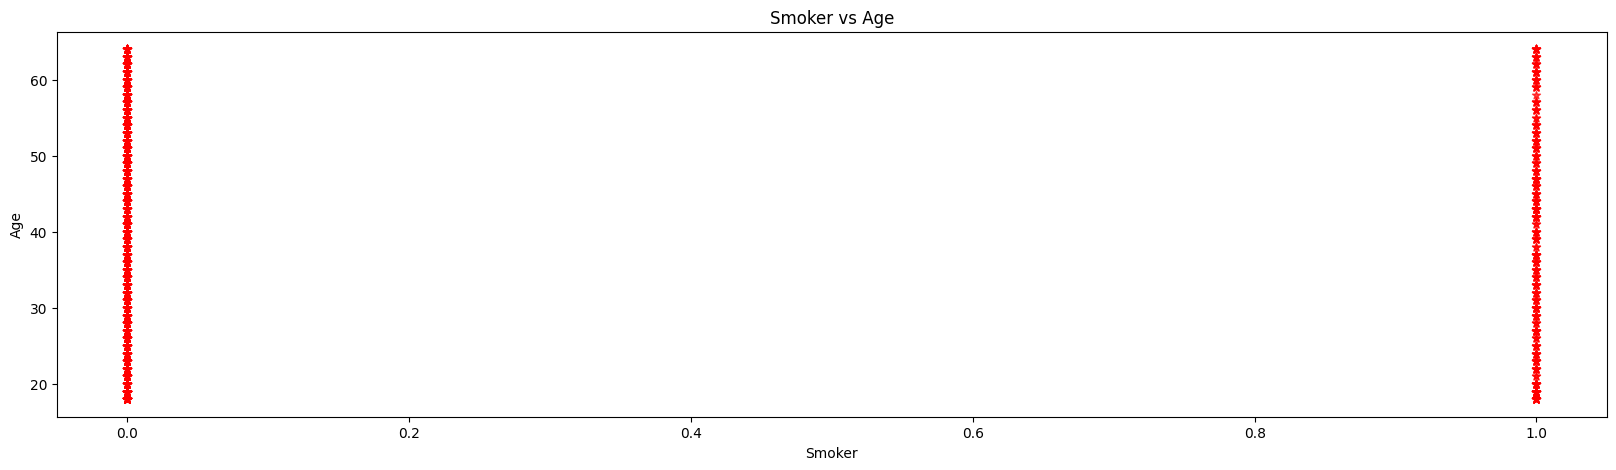

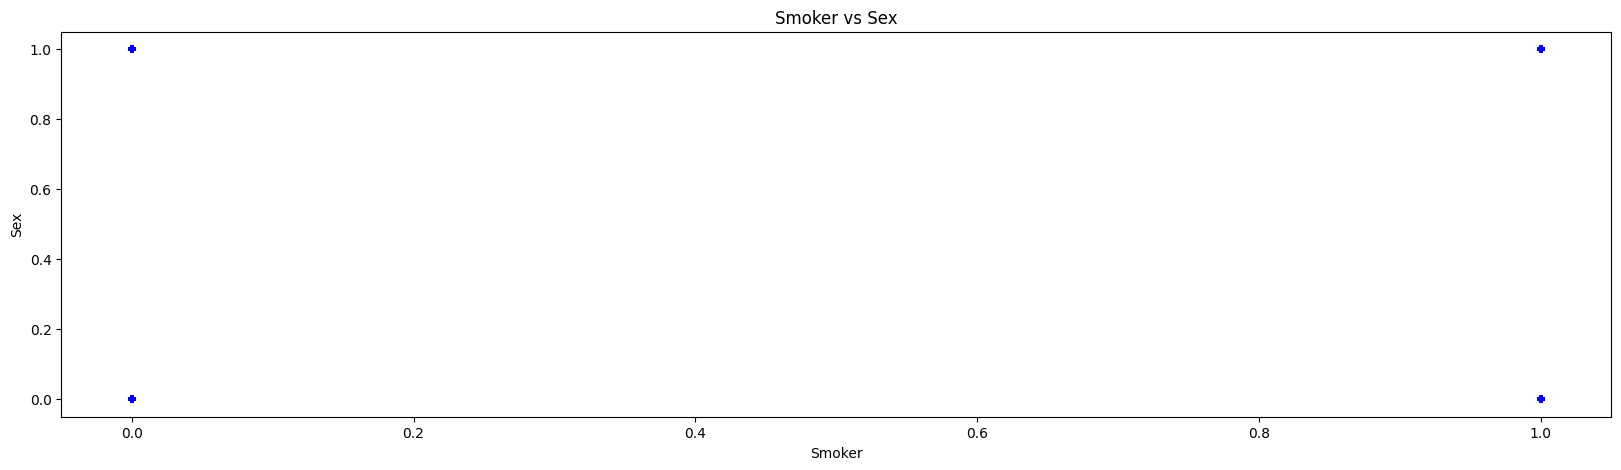

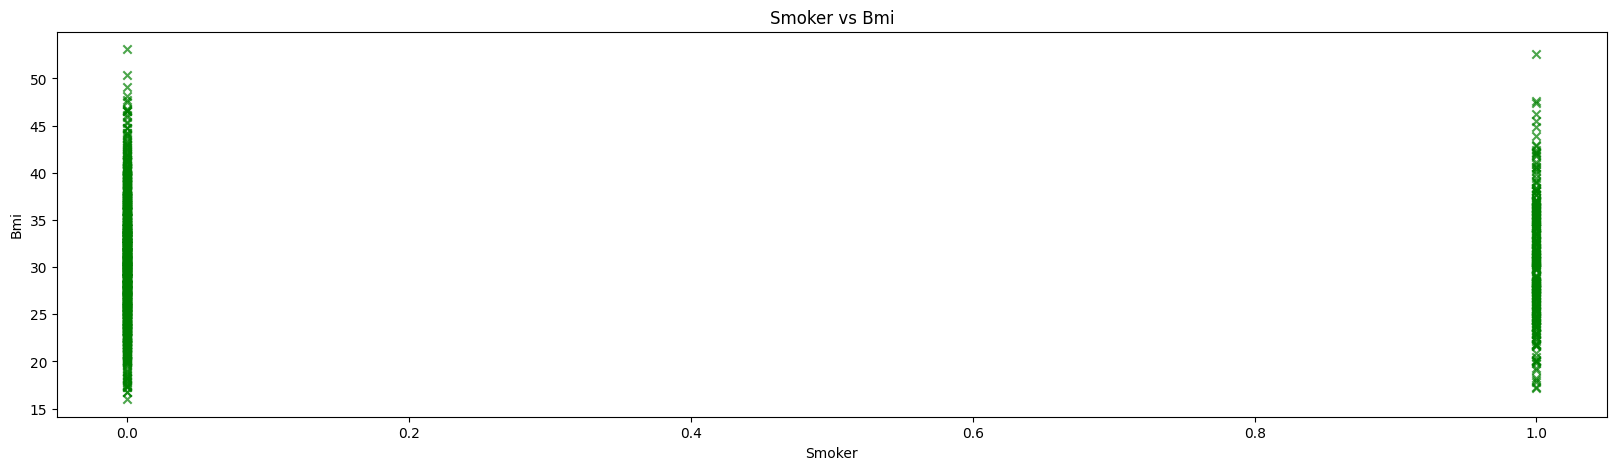

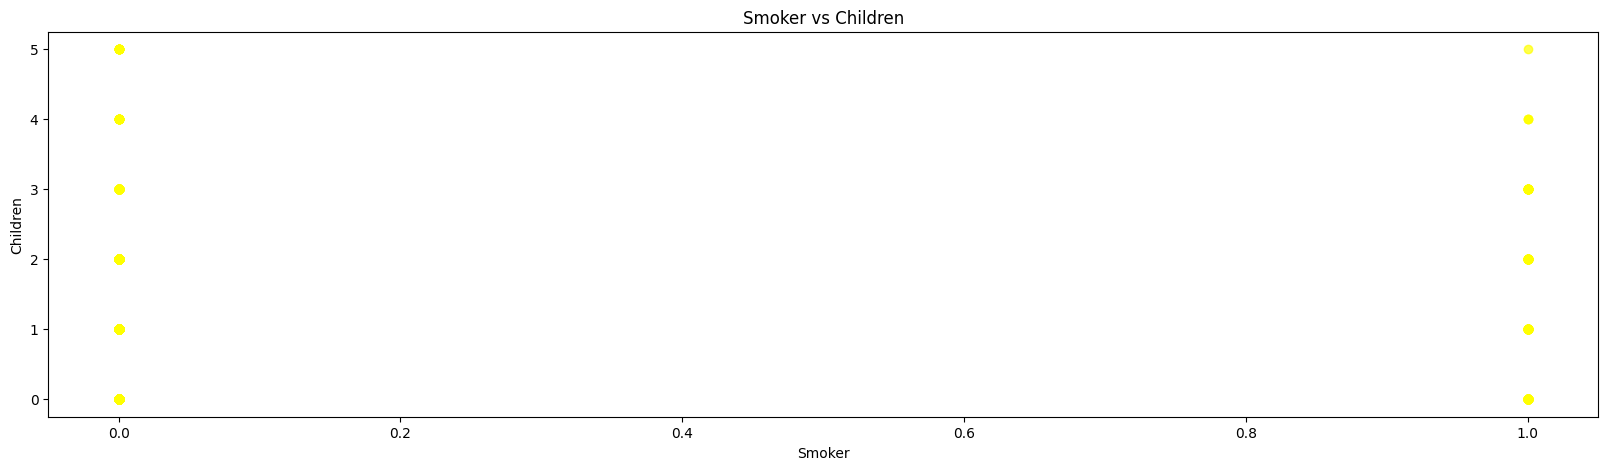

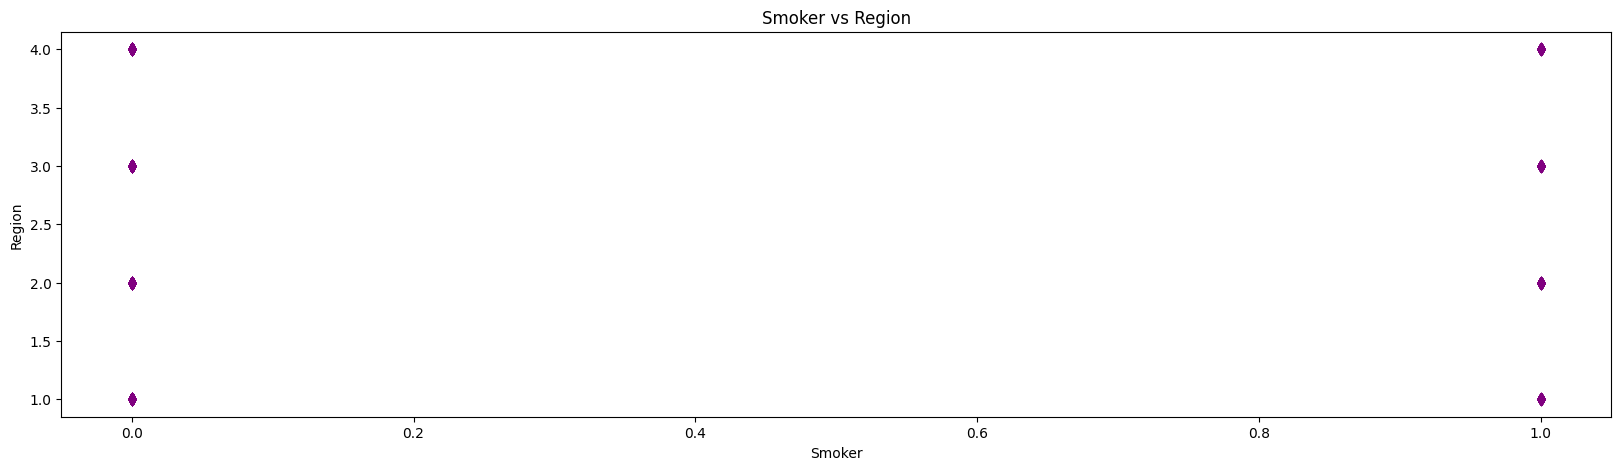

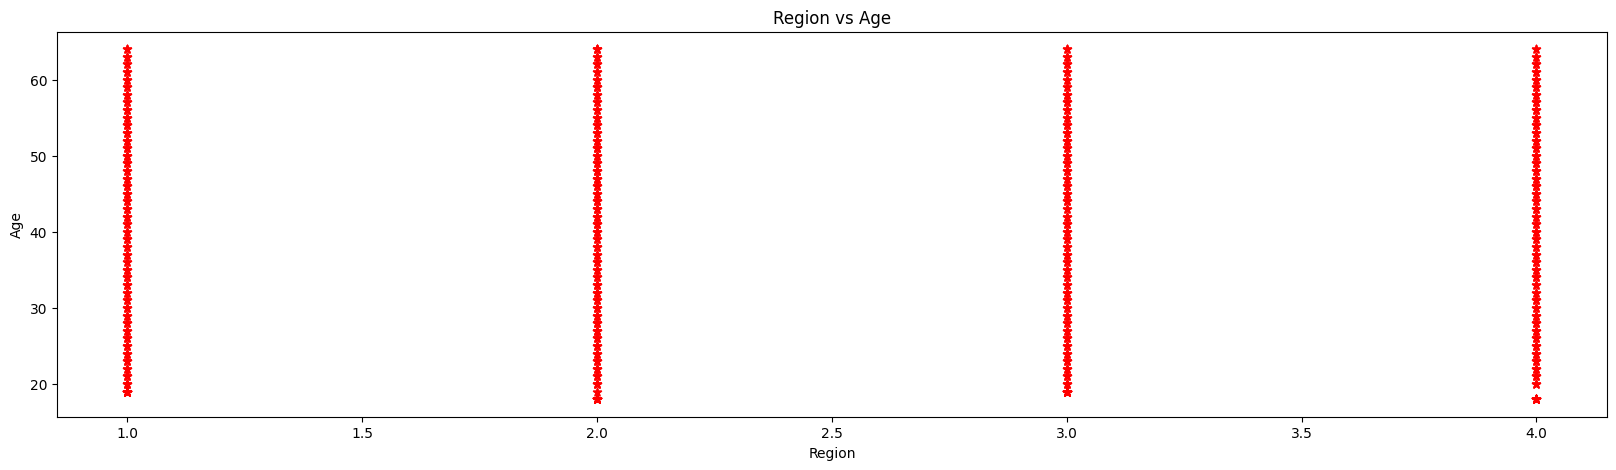

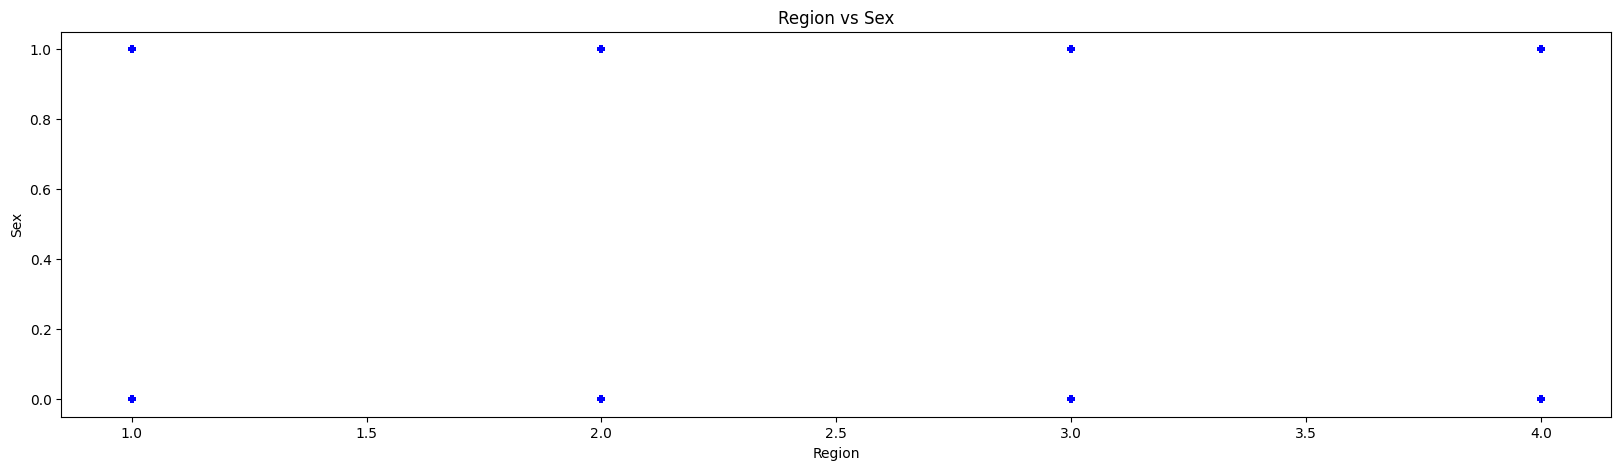

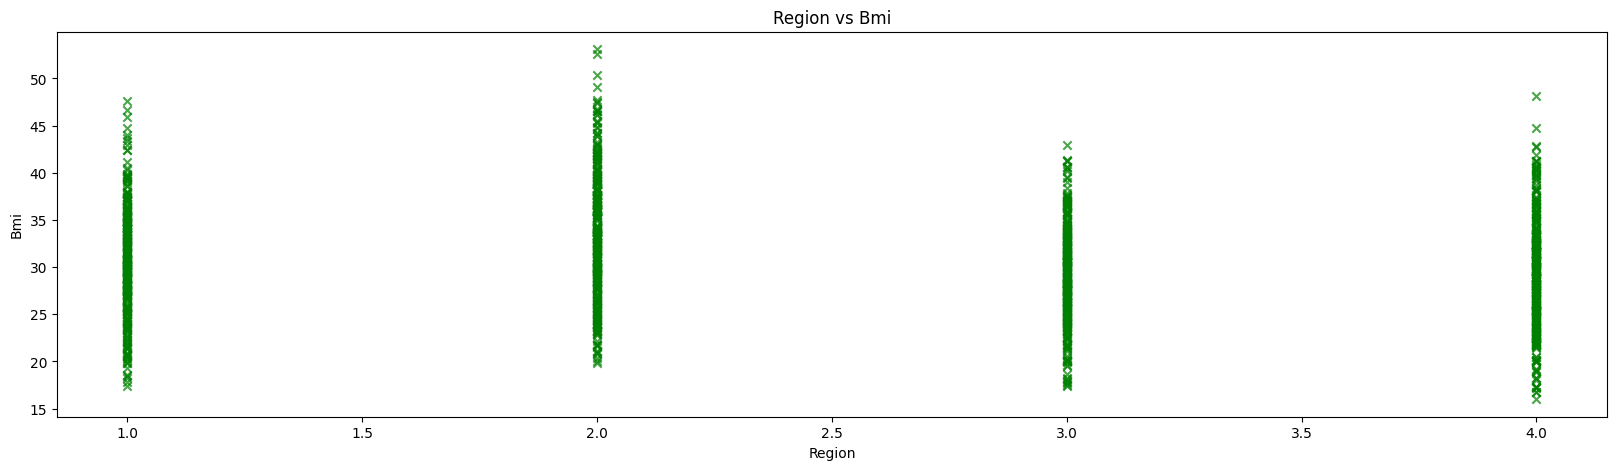

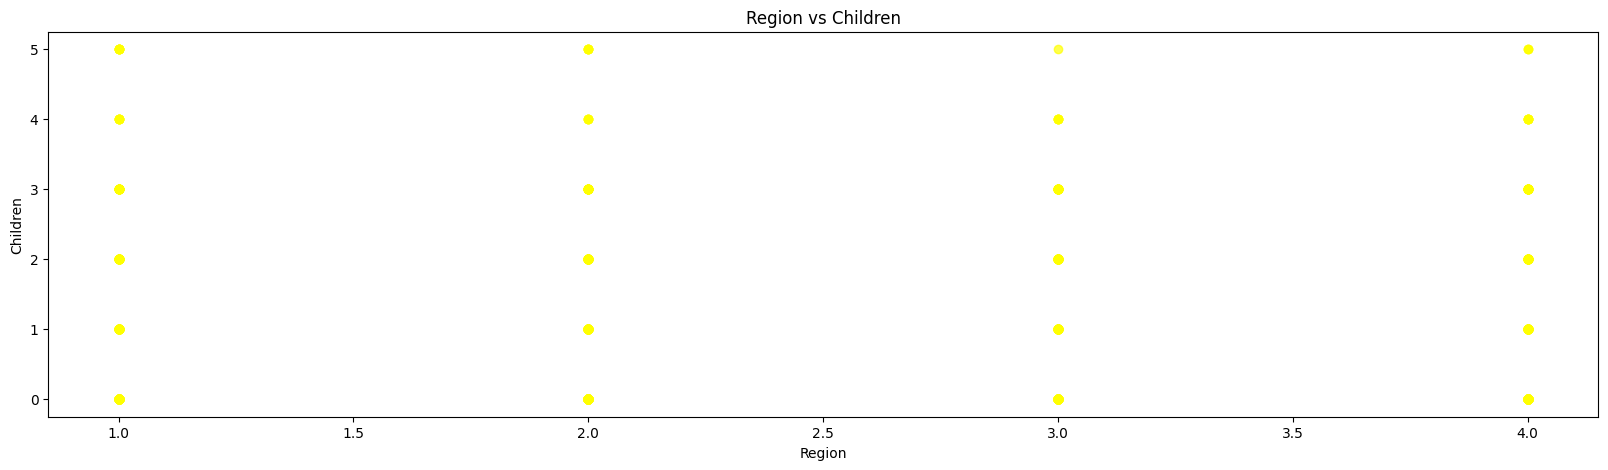

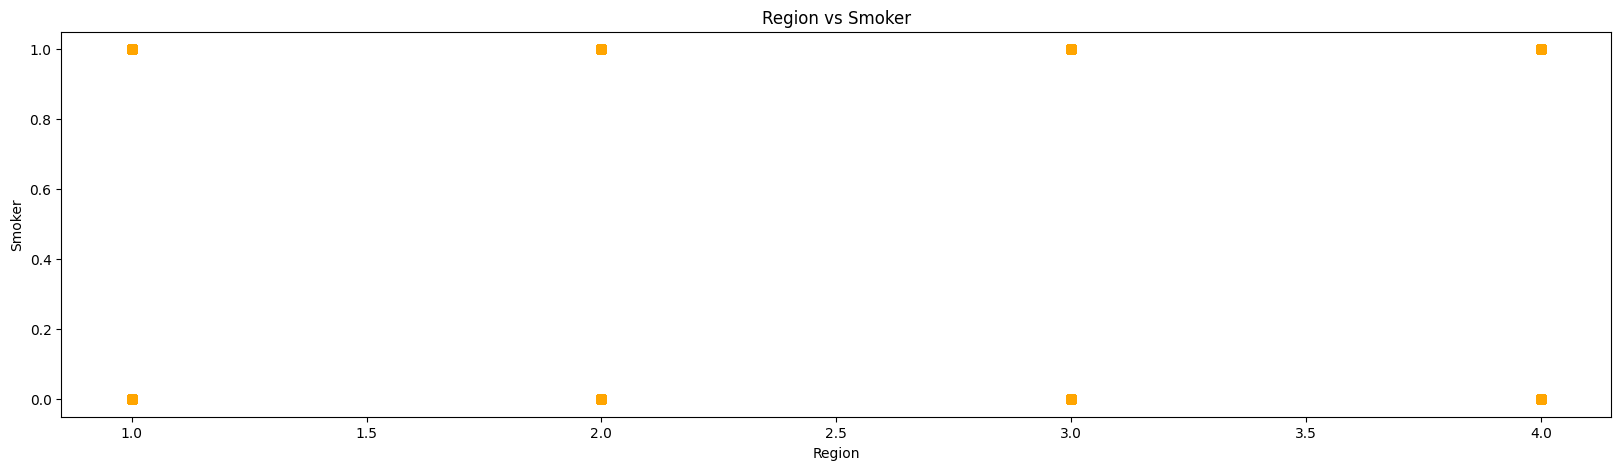

In [143]:
import matplotlib.pyplot as plt
import pandas as pd

columns_to_plot = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple']
markers = ['*', '+', 'x', 'o', 's', 'd']

for x_col in columns_to_plot:
    for y_col in columns_to_plot:
        if x_col == y_col:
            continue

        plt.figure(figsize=(20, 5))

        if df[y_col].dtype == 'object':
            unique_vals = df[y_col].unique()
            for j, val in enumerate(unique_vals):
                filtered_df = df[df[y_col] == val]
                plt.scatter(
                    filtered_df[x_col],
                    [j] * len(filtered_df),
                    label=val,
                    alpha=0.7,
                    color=colors[j % len(colors)],
                    marker=markers[j % len(markers)]
                )
            plt.yticks(range(len(unique_vals)), unique_vals)
        else:
            plt.scatter(
                df[x_col],
                df[y_col],
                c=colors[columns_to_plot.index(y_col) % len(colors)],
                marker=markers[columns_to_plot.index(y_col) % len(markers)],
                alpha=0.7
            )

        plt.title(f'{x_col.capitalize()} vs {y_col.capitalize()}')
        plt.xlabel(x_col.capitalize())
        plt.ylabel(y_col.capitalize())

        if y_col == 'smoker':
            for k in range(len(df)):
                plt.text(
                    df[x_col].iloc[k],
                    0 if df['smoker'].iloc[k] == 'no' else 1,
                    'Smoker' if df['smoker'].iloc[k] == 'yes' else '',
                    fontsize=6,
                    color='red',
                    alpha=0.8
                )

        if df[y_col].dtype == 'object':
            plt.legend(title=y_col.capitalize())

        plt.show()